# Introduction to plotting <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **Acknowledgement**: This notebook was originally created by [Digital Eath Australia (DEA)](https://www.ga.gov.au/about/projects/geographic/digital-earth-australia) and has been reformatted for use in the EY Data Science Program
* **Products used:** 
[ga_s2a_ard_nbar_granule](https://explorer.sandbox.dea.ga.gov.au/ga_s2a_ard_nbar_granule)
* **Prerequisites:** Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_Jupyter_notebooks.ipynb)
    * The basic structure of the DEA [satellite datasets](02_DEA.ipynb)
    * Inspecting available [DEA products and measurements](03_Products_and_measurements.ipynb)
    * How to [load data from DEA](04_Loading_data.ipynb)

## Background
Data visualisation is an important component of working with Earth Observation data.
The `xarray` Python package provides a range of straightforward data plotting options that allow users to quickly generate simple plots from multi-dimensional datasets. 
To generate more complex and informative plots, the DEA Notebooks repository also provides a custom plotting module with additional easy-to-use functionality.

## Description
This introductory notebook demonstrates how to visualise DEA satellite data returned from running a datacube query.
The notebook demonstrates commonly used `xarray` plotting methods, as well as custom functions provided in the [dea_plotting](../scripts/dea_plotting.py) script.

Topics covered in this notebook include:

1. View an area of interest prior to querying the datacube
2. Querying the datacube and loading data
3. Plotting single band data (e.g. a single satellite band)
    * Selecting and plotting individual timesteps
    * Plotting multiple timesteps
    * Customising plot appearance
4. Plotting three-band true or false colour imagery
    * Plotting single timesteps
    * Plotting multiple timesteps
    * Customising plot appearance

***

## Getting started
To run this introduction to plotting data loaded from the datacube, run all the cells in the notebook starting with the "Load packages" cell. For help with running notebook cells, refer back to the [Jupyter Notebooks notebook](01_Jupyter_notebooks.ipynb). 

### Load packages
The first step is to run `%matplotlib inline`, which ensures figures plot correctly in the Jupyter notebook.
Next, load the `datacube` package, which enables loading data and a selection of custom DEA functions from the `dea_plotting` script (located inside the [dea-notebooks repository](https://github.com/GeoscienceAustralia/dea-notebooks)).

In [1]:
%matplotlib inline

import datacube
import sys

sys.path.append("../scripts")
from dea_plotting import display_map
from dea_plotting import rgb

### Connect to the datacube
The next step is to connect to the datacube database.
The resulting `dc` datacube object can then be used to load data.
The `app` parameter is a unique name used to identify the notebook that does not have any effect on the analysis.

In [2]:
dc = datacube.Datacube(app="05_Plotting")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_range`: The latitude range to analyse (e.g. `(-27.715, -27.755)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `lon_range`: The longitude range to analyse (e.g. `(153.42, 153.46)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `time_range`: The date range to analyse (e.g. `("2017-12", "2018-01")`).


In [72]:
lat_range = (-38.45, -38.55)
lon_range = (145.15, 145.25)
time_range = ("2017-12", "2018-01")

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The `display_map()` function shows your selected area as a red rectangle on an interactive map.
Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [42]:
display_map(x=lon_range, y=lat_range)

## Query and view data
The variables specified above are used to load data from  the DEA datacube through the `dc.load()`, which was introduced in the [Loading data notebook](04_Loading_data.ipynb).
This introduction will continue to use the `ga_s2a_ard_nbar_granule` product, as used in the [Loading data notebook](04_Loading_data.ipynb).

In [73]:
ds = dc.load(product="ga_s2a_ard_nbar_granule",
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs="epsg:4326",
             resolution=(-0.001, 0.001))
print(ds)

<xarray.Dataset>
Dimensions:               (latitude: 100, longitude: 100, time: 6)
Coordinates:
  * time                  (time) datetime64[ns] 2017-12-07T00:20:51.026000 ... 2018-01-23T00:11:01.026000
  * latitude              (latitude) float64 -38.45 -38.45 ... -38.55 -38.55
  * longitude             (longitude) float64 145.2 145.2 145.2 ... 145.2 145.2
    spatial_ref           int32 4326
Data variables:
    azimuthal_exiting     (time, latitude, longitude) float32 -79.02252 ... 101.04572
    azimuthal_incident    (time, latitude, longitude) float32 63.28925 ... 67.32028
    exiting               (time, latitude, longitude) float32 8.446804 ... 6.2441096
    incident              (time, latitude, longitude) float32 27.943192 ... 35.33823
    relative_azimuth      (time, latitude, longitude) float32 217.68823 ... 33.72544
    relative_slope        (time, latitude, longitude) float32 142.31177 ... -33.72544
    satellite_azimuth     (time, latitude, longitude) float32 280.97748 ... 

## Plotting single band images

The `xarray` package provides built-in methods for plotting individual data variables or measurements.

To do this, identify the band to plot.
In this example, the `nbar_nir_1` satellite band is used.
To plot a single band, the data must be an `xarray.DataArray` (to revise the difference between `xarray.Dataset` and `xarray.DataArray` objects, refer back to the [Loading data](04_Loading_data.ipynb) notebook):

In [74]:
print(ds.nbar_nir_1)

<xarray.DataArray 'nbar_nir_1' (time: 6, latitude: 100, longitude: 100)>
array([[[ 830,  551,  432, ..., 2171, 3839, 4361],
        [1072,  410,  319, ..., 2783, 4127, 2659],
        [1038,  580,  417, ..., 2046, 2992, 3683],
        ...,
        [ 616,  502,  422, ..., 2370, 2247, 1550],
        [ 821,  461,  573, ..., 2205, 2019, 1956],
        [ 627,  485,  476, ..., 1361, 2286, 2278]],

       [[7766, 7969, 7881, ..., 6766, 6732, 6338],
        [7915, 7981, 7870, ..., 6822, 6447, 6346],
        [7866, 7977, 8132, ..., 6889, 6396, 6308],
        ...,
        [5253, 5450, 5830, ..., 6987, 7030, 6702],
        [5223, 5425, 5483, ..., 6872, 7064, 6847],
        [5104, 5214, 5408, ..., 6631, 6648, 6607]],

       [[ 469,  557,  481, ..., 3216, 2321, 3137],
        [ 435,  587,  431, ..., 2711, 3973, 3979],
        [ 546,  500,  547, ..., 1355, 4871, 2565],
        ...,
        [ 525,  564,  453, ...,  621,  607,  579],
        [ 533,  531,  559, ...,  585,  671,  649],
        [ 479,  6

### Selecting and plotting a single timestep

The returned object header above specifies that `ds.nbar_nir_1` is a `xarray.DataArray` with five timesteps (i.e. `<xarray.DataArray 'nbar_nir_1' (time: 6, y: 100, x: 100)>`).
To make a plot for a single timestep only, select the desired timestep using one of the following options:

1. `.isel()`: This stands for "index selection", which selects individual timesteps from a dataset based on the sequence of loaded timesteps. 
Counting in Python begins at 0, so to select the first timestep in the `xarray.DataArray` we can specify `.isel(time=0)`:

In [75]:
first_timestep = ds.nbar_nir_1.isel(time=0)

print(first_timestep)

<xarray.DataArray 'nbar_nir_1' (latitude: 100, longitude: 100)>
array([[ 830,  551,  432, ..., 2171, 3839, 4361],
       [1072,  410,  319, ..., 2783, 4127, 2659],
       [1038,  580,  417, ..., 2046, 2992, 3683],
       ...,
       [ 616,  502,  422, ..., 2370, 2247, 1550],
       [ 821,  461,  573, ..., 2205, 2019, 1956],
       [ 627,  485,  476, ..., 1361, 2286, 2278]], dtype=int16)
Coordinates:
    time         datetime64[ns] 2017-12-07T00:20:51.026000
  * latitude     (latitude) float64 -38.45 -38.45 -38.45 ... -38.55 -38.55
  * longitude    (longitude) float64 145.2 145.2 145.2 ... 145.2 145.2 145.2
    spatial_ref  int32 4326
Attributes:
    units:                1
    nodata:               -999
    spectral_definition:  {'response': [0.000451, 0.007614, 0.019072, 0.03349...
    crs:                  epsg:4326
    grid_mapping:         spatial_ref


2. `.sel()`: This selects data using real-world coordinate labels like `time`. 
    For example, from the **Coordinates** section, the first timestep (i.e. the 12th December 2017) is selected from the `xarray.DataArray` by specifying `.sel(time='2017-12-07')`:

In [76]:
first_timestep = ds.nbar_nir_1.sel(time='2017-12-07')

print(first_timestep)

<xarray.DataArray 'nbar_nir_1' (time: 1, latitude: 100, longitude: 100)>
array([[[ 830,  551,  432, ..., 2171, 3839, 4361],
        [1072,  410,  319, ..., 2783, 4127, 2659],
        [1038,  580,  417, ..., 2046, 2992, 3683],
        ...,
        [ 616,  502,  422, ..., 2370, 2247, 1550],
        [ 821,  461,  573, ..., 2205, 2019, 1956],
        [ 627,  485,  476, ..., 1361, 2286, 2278]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-07T00:20:51.026000
  * latitude     (latitude) float64 -38.45 -38.45 -38.45 ... -38.55 -38.55
  * longitude    (longitude) float64 145.2 145.2 145.2 ... 145.2 145.2 145.2
    spatial_ref  int32 4326
Attributes:
    units:                1
    nodata:               -999
    spectral_definition:  {'response': [0.000451, 0.007614, 0.019072, 0.03349...
    crs:                  epsg:4326
    grid_mapping:         spatial_ref


After selecting a timestep, the `.plot()` method can be used to display the chosen `nbar_nir_1` data:

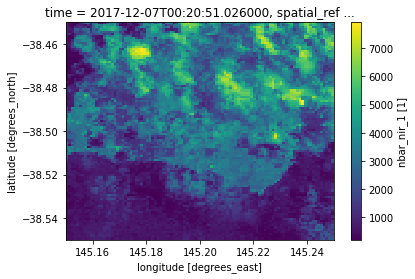

In [77]:
first_timestep.plot()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.
To plot multiple images, skip the `isel()` step above and plot the entire `xarray.DataArray` directly. 

To plot multiple timesteps in one figure, it is necessary to instruct the `.plot()` function to put each timestep in a different column.
This is done by specifying `.plot(col="time")`:

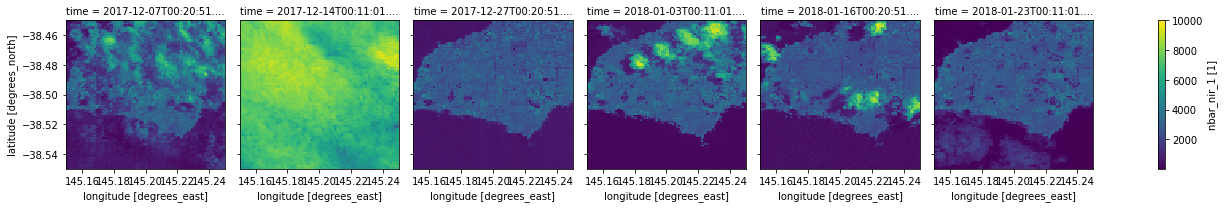

In [78]:
ds.nbar_nir_1.plot(col="time")

> This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

### Customising plot appearance
The plots above are dark and difficult to see clearly.
To improve the appearance of `xarray` plots, use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. 
This will use the 2nd and 98th percentiles of the data to compute the color limits:

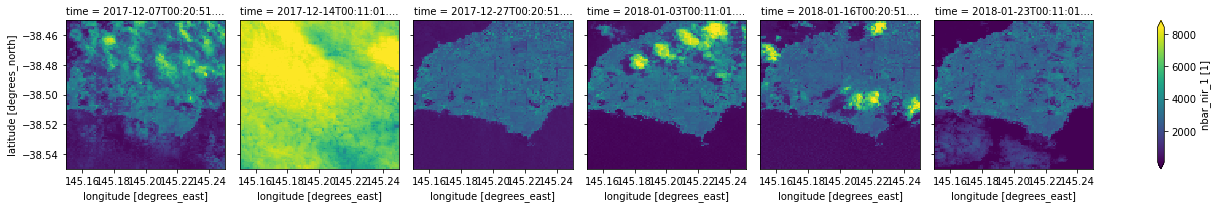

In [79]:
ds.nbar_nir_1.plot(col="time", robust=True)

Plots can be further customised by adding custom colour maps/styles using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. 
The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

The example cell below plots the data with the perceptually uniform `magma` colour map:


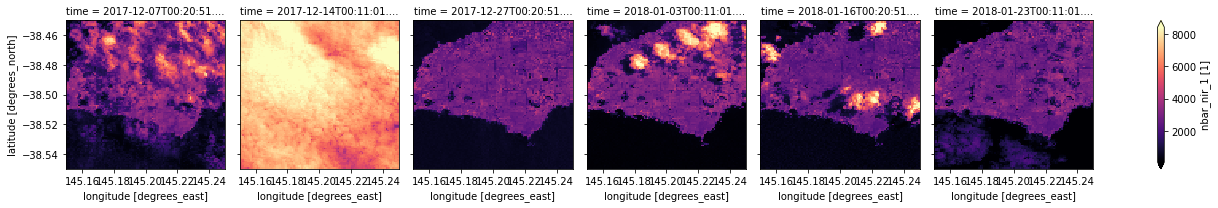

In [80]:
ds.nbar_nir_1.plot(col="time", robust=True, cmap="magma")

## Plotting true or false colour RGB images

Although `xarray` makes it easy to plot single band images, plotting a three band colour photo-like image is less straightforward.

To make this easier, the [dea-notebooks repository](https://github.com/GeoscienceAustralia/dea-notebooks) provides a custom `rgb()` function that is designed for plotting three band images.
The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

Providing the `nbar_red`, `nbar_green` and `nbar_blue` measurements from a dataset will produce a true colour image (akin to how humans view the landscape).
Providing `nir`, `red` and `green` measurements or any other set of three satellite bands from a dataset will produce a false colour image.

> [Learn more about colour rendering](https://en.wikipedia.org/wiki/False_color#True_color).

Hence, the `rgb()` function can be used to visualise the data returned by a query.
It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

### Plotting a single timestep

The time dimension of an `xarray.Dataset` describes how many timesteps exist for the loaded data.
In the `rgb()` function, the `index` variable is asking for which timesteps to view (similar to the `isel()` example above).
Remember: counting in Python begins at 0 so to view the third timestep set `index=2`:

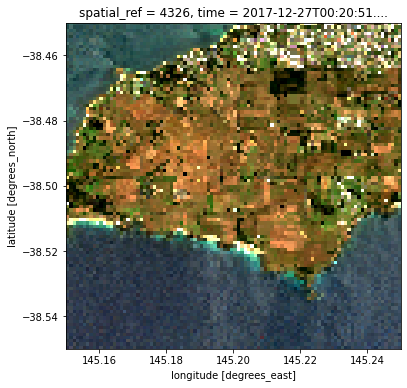

In [81]:
# View a red, green, blue (true colour) image of the third timestep
rgb(ds, bands=["nbar_red", "nbar_green", "nbar_blue"], index=2)

It is possible to change the input bands to plot a false colour image, which can provide different insights in a landscape.
The false colour band combination (`swir1`, `nir`, `green`) emphasises growing vegetation in green, and water in deep blue:

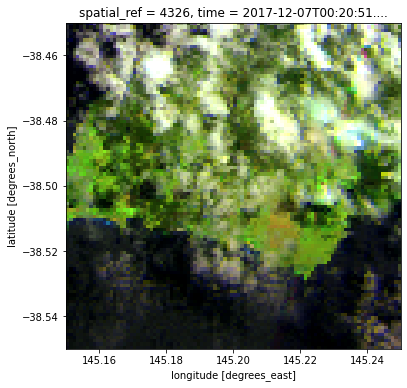

In [82]:
# View a swir1, nir, green (false colour) image of the first timestep
rgb(ds, bands=['nbar_swir_2', 'nbar_nir_2', 'nbar_green'], index=0)

### Plotting multiple timesteps
As discussed in the [single band example above](#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function can also do this, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`.
The example cell below plots the first and third image in the dataset using `index=[0, 2]` (remembering that counting in Python starts at 0):

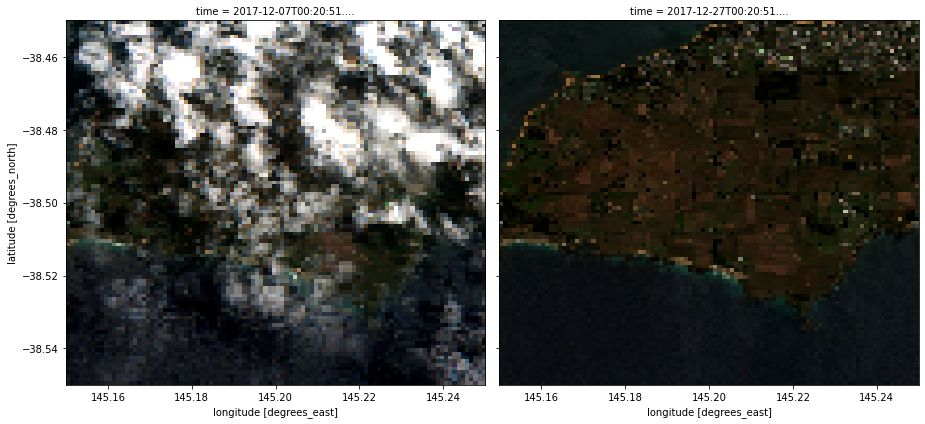

In [83]:
# View a true colour image for the first and third timesteps
rgb(ds, bands=['nbar_red', 'nbar_green', 'nbar_blue'], index=[0, 2])

It is also possible to use `rgb()` to plot all timesteps in a dataset using the `col="time"` syntax demonstrated in the [single band example above](#Plotting-multiple-timesteps): 

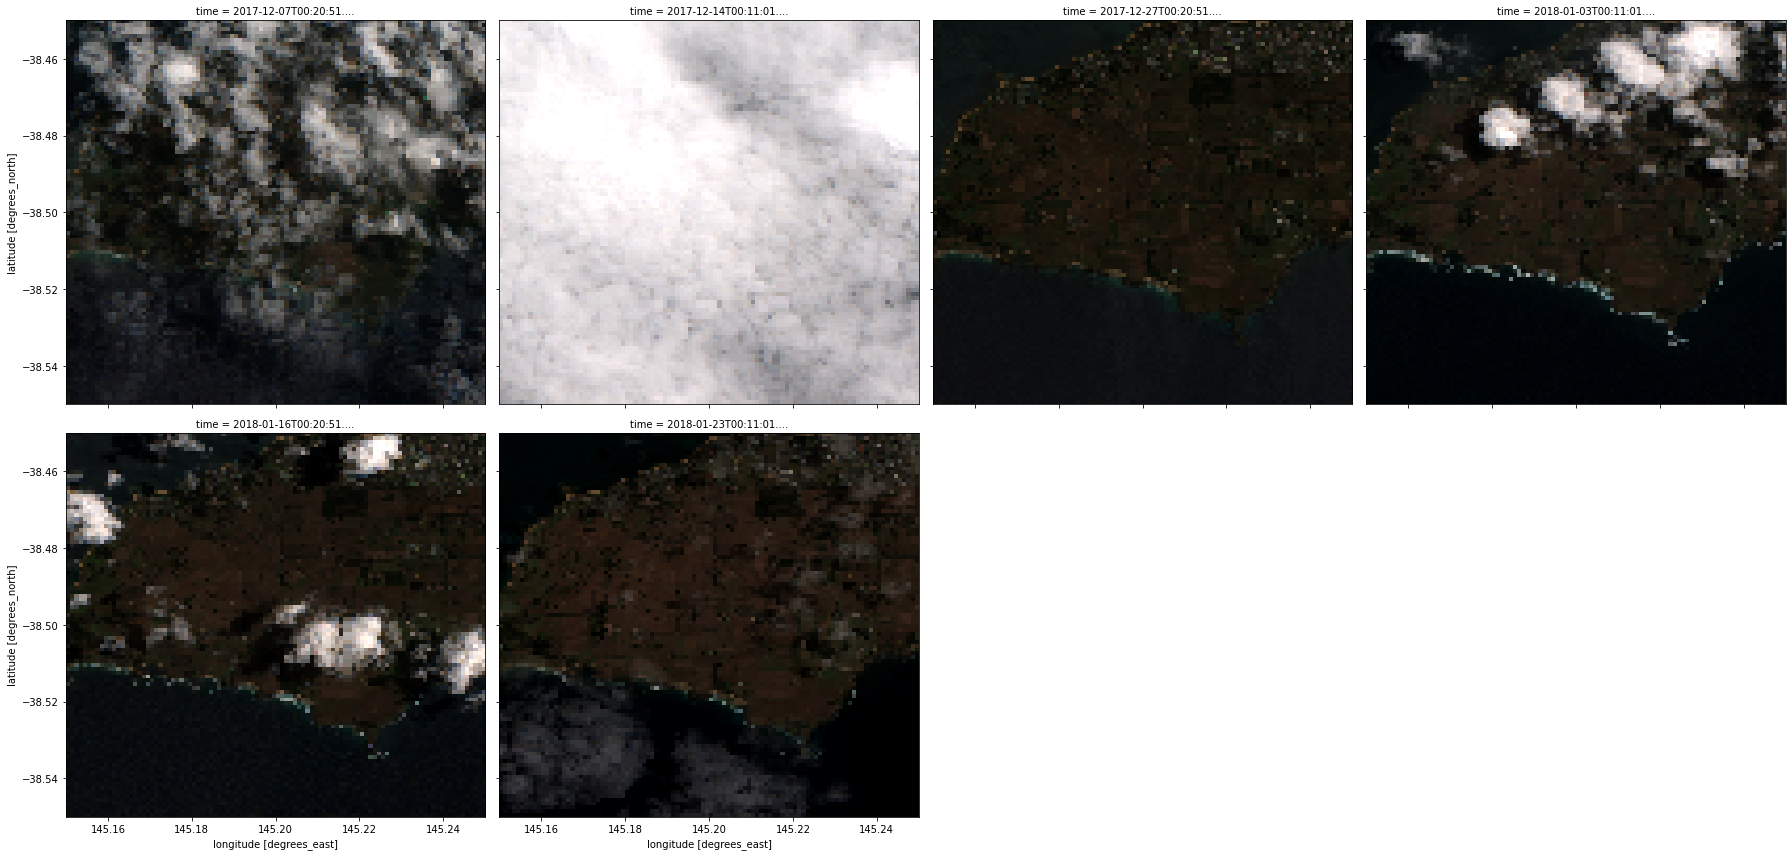

In [84]:
# Plot all timesteps in the dataset
rgb(ds, bands=['nbar_red', 'nbar_green', 'nbar_blue'], col="time")

### Customising plot appearance
By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. 
This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot.

For example, specifying `percentile_stretch=[0.05, 0.95]` will clip out the darkest and brightest 5% of pixels, focusing the colour stretch on the remaining 90% of less extreme values:

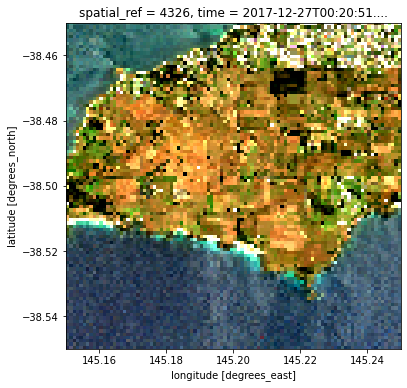

In [88]:
rgb(ds, 
    bands=['nbar_red', 'nbar_green', 'nbar_blue'], 
    index=2, 
    percentile_stretch=[0.05, 0.95])


## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](01_Jupyter_notebooks.ipynb)
2. [Digital Earth Australia](02_DEA.ipynb)
3. [Products and measurements](03_Products_and_measurements.ipynb)
4. [Loading data](04_Loading_data.ipynb)
5. **Plotting (this notebook)**
6. [Performing a basic analysis](06_Basic_analysis.ipynb)
7. [Introduction to Numpy](07_Intro_to_numpy.ipynb)
8. [Introduction to Xarray](08_Intro_to_xarray.ipynb)
9. [Parallel processing with Dask](09_Parallel_processing_with_dask.ipynb)

For advanced plotting and visualisation options, see:

* The [dea plotting](../Scripts/dea_plotting.py) Python script containing functions used for plotting and visualising DEA data.

Once you have you have completed the beginner tutorials, join advanced users in exploring:

* The "DEA datasets" directory in the repository, where you can explore DEA products in depth.
* The "Frequently used code" directory, which contains a recipe book of common techniques and methods for analysing DEA data.
* The "Real-world examples" directory, which provides more complex workflows and analysis case studies.




***
## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question in the [Troubleshooting EY Data Science Program MS Teams Channel](https://teams.microsoft.com/l/channel/19%3a90804a73cb5a4159a60693c41a8820d2%40thread.tacv2/Troubleshooting?groupId=f6acd945-fed9-4db4-bed8-414988473a36&tenantId=5b973f99-77df-4beb-b27d-aa0c70b8482c) or on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** October 2020

In [18]:
print(datacube.__version__)

1.8.3
